<a href="https://colab.research.google.com/github/irfanfadhullah/DTI-Telkom/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Multiple Linear Regression Cases with Pie Dataset**

---

---





In [2]:
#Import Common Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


In [4]:
df.describe()

,week,pie_sales,price,advertising
count,15.000000,15.000000,15.000000,15.00000
mean,8.000000,399.333333,6.613333,3.48000
std,4.472136,63.523524,1.171609,0.48873
min,1.000000,300.000000,4.500000,2.70000
25%,4.500000,350.000000,5.700000,3.10000
50%,8.000000,430.000000,7.000000,3.50000
75%,11.500000,450.000000,7.500000,3.85000
max,15.000000,490.000000,8.000000,4.50000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


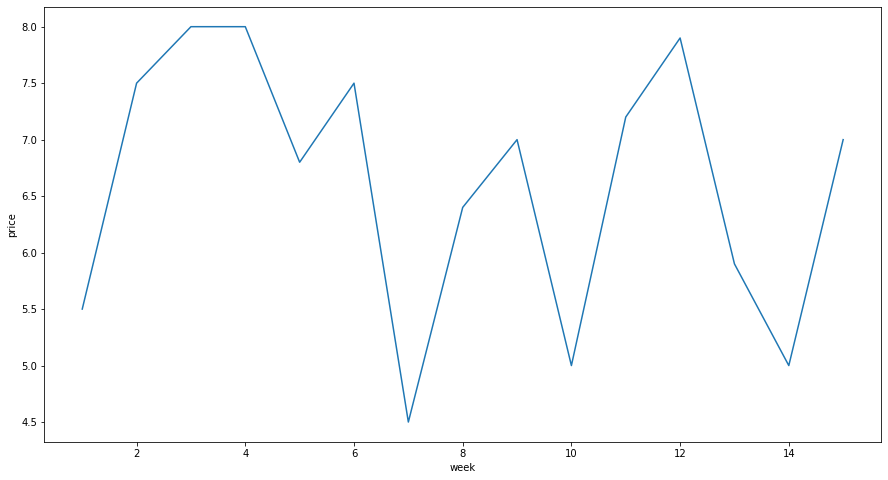

In [5]:
plt.figure(figsize=(15,8))
sns.lineplot(df['week'],df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


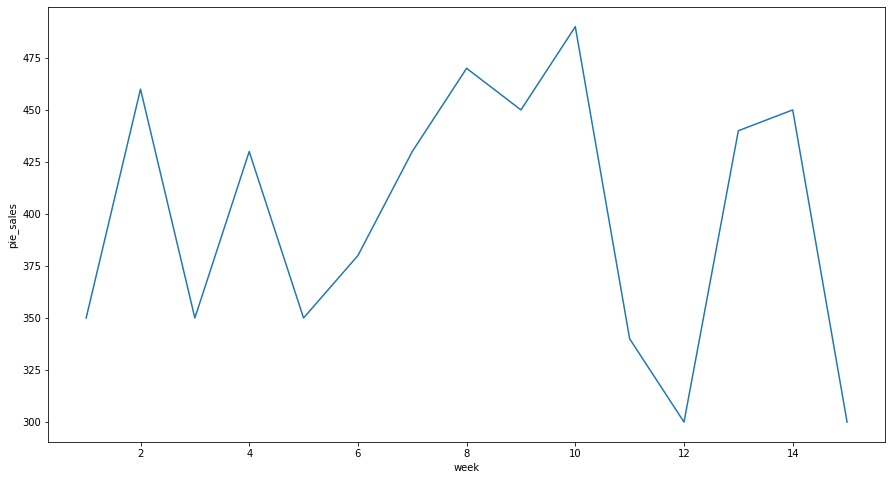

In [6]:
plt.figure(figsize=(15,8))
sns.lineplot(df['week'],df['pie_sales'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


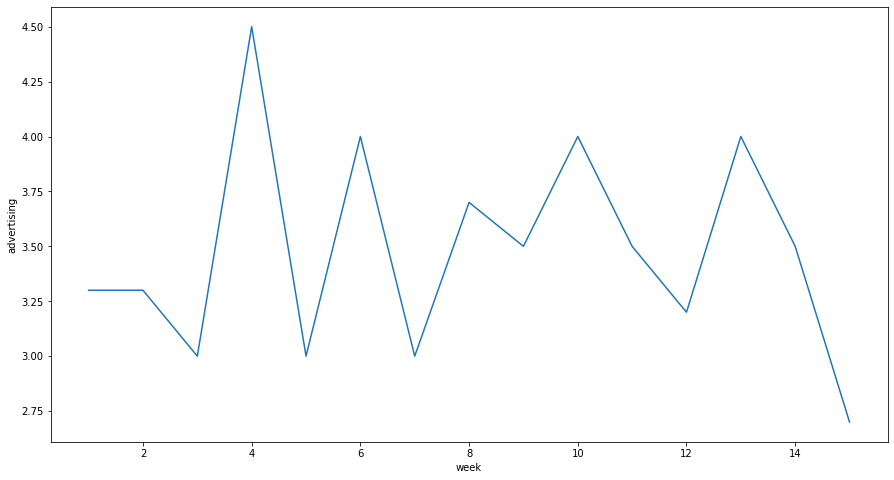

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(df['week'],df['advertising'])

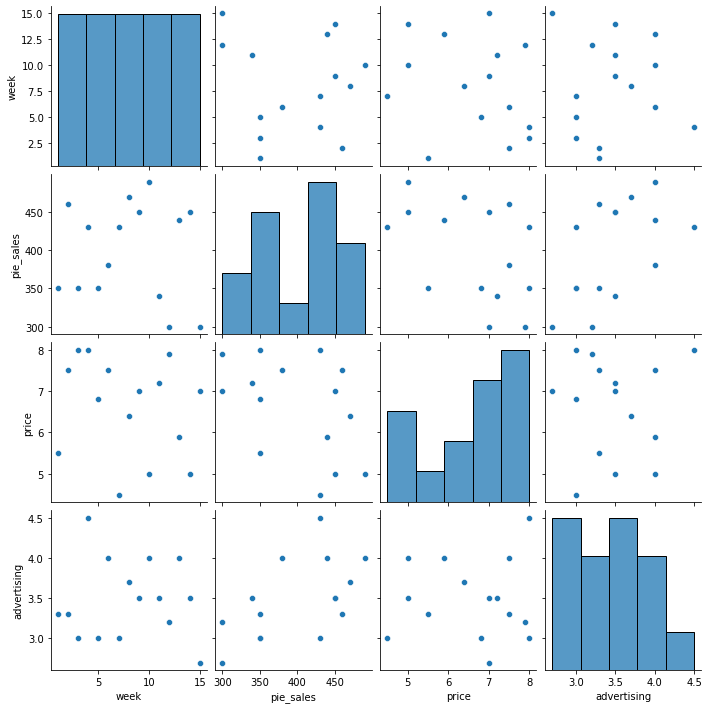

In [8]:
sns.pairplot(df)

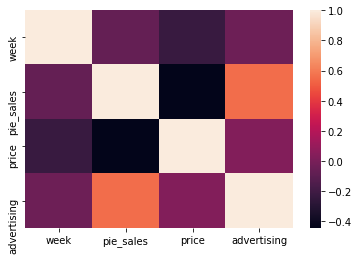

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()

,week,pie_sales,price,advertising
week,1.000000,-0.067887,-0.227662,-0.039217
pie_sales,-0.067887,1.000000,-0.443273,0.556320
price,-0.227662,-0.443273,1.000000,0.030438
advertising,-0.039217,0.556320,0.030438,1.000000


In [11]:
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


<h1>Modeling

In [28]:
X = df.drop(['pie_sales'],axis=1)
Y = df['pie_sales']

In [29]:
X = np.array(X)
Y = np.array(Y)

In [23]:
X

array([[5.5, 3.3],
       [7.5, 3.3],
       [8. , 3. ],
       [8. , 4.5],
       [6.8, 3. ],
       [7.5, 4. ],
       [4.5, 3. ],
       [6.4, 3.7],
       [7. , 3.5],
       [5. , 4. ],
       [7.2, 3.5],
       [7.9, 3.2],
       [5.9, 4. ],
       [5. , 3.5],
       [7. , 2.7]])

In [24]:
model = LinearRegression()

In [25]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


<h1>Stat Model

In [18]:
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              223.0
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                    8.70e-11
Time:                        05:35:21   Log-Likelihood:                         -81.015
No. Observations:                  15   AIC:                                      168.0
Df Residuals:                      12   BIC:                                      170.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


the r-squared is:  0.2363976571016354
the coefficient (value of a) for age, weight, constant is:  [  0.60180467  -7.44038309 126.52304475]


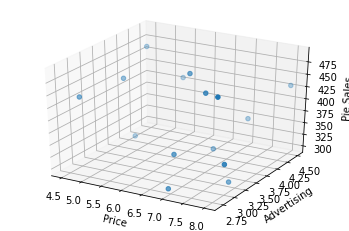

In [30]:
# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], Y)
ax.set_xlabel('Price')
ax.set_ylabel('Advertising')
ax.set_zlabel('Pie Sales')

# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for age, weight, constant is: ", a)

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)



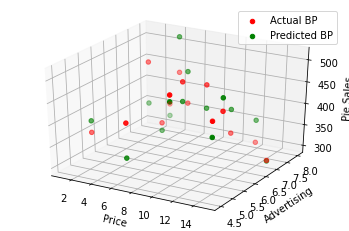

In [33]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted BP')
ax.set_xlabel('Price')
ax.set_ylabel('Advertising')
ax.set_zlabel('Pie Sales')
ax.legend()
plt.show()

<h1>Check Assumption</h1>

1. Linear Relationship <br>
    Dari hasil plot correlasi terdapat hasil bahwa antara sales pie dengan variable lain terdapat hubungan yaitu :
    <br>Price sebesar -44 %
  <br>  Advertising sebesar 55%

2. Check Normal Distribution<br>
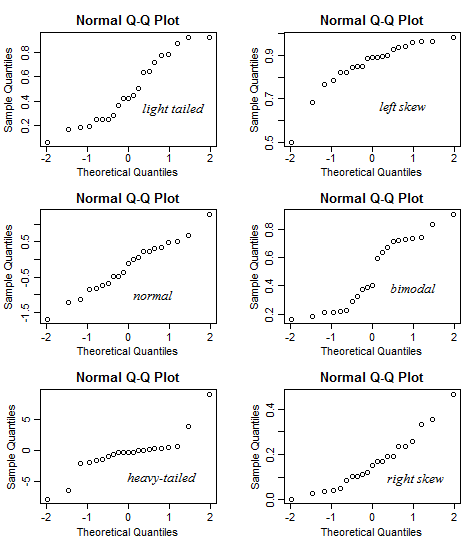

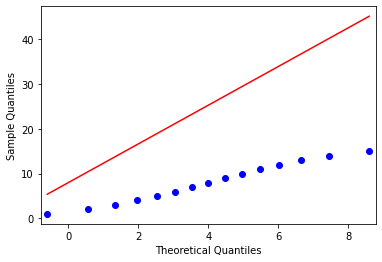

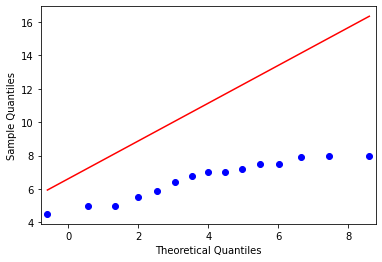

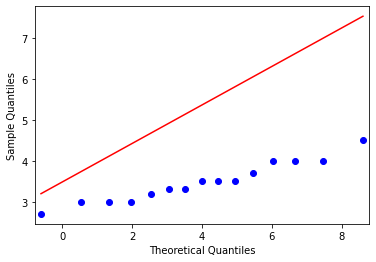

In [34]:
import scipy.stats as stats
import pylab
sm.qqplot(df['week'], loc = 4, scale = 3, line='s')
sm.qqplot(df['price'], loc = 4, scale = 3, line='s')
sm.qqplot(df['advertising'], loc = 4, scale = 3, line='s')
pylab.show()

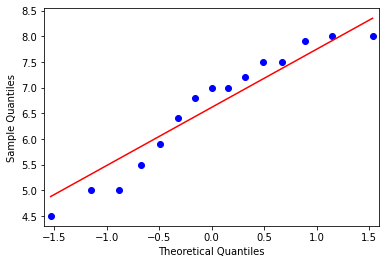

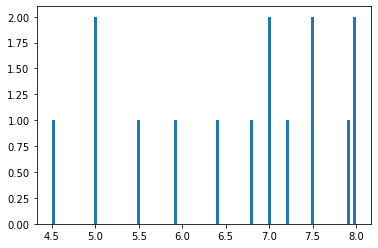

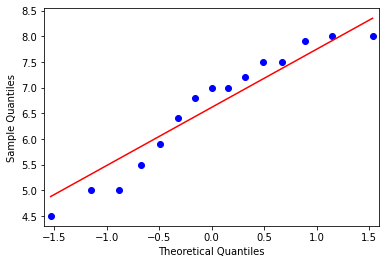

In [35]:
res = plt.hist(df['price'], bins=100)
sm.qqplot(df['price'], line='s')

3. Check Multicollinearity<br>
Dilihat dari gambar atau plot heatmap, dapat disimpulan bahwa tidak ada multicollinearity atau jikapun ada hanya bertaraf rendah.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)

[4.095819537178952, 22.38677732268499, 25.595759345052507]


Pada hasil Variance Inflation Factor, dapat dilihat bahwa hasilnya tidak ad ayang bernilai infinite, maka tidak ada yang linearity saling ketergantungan terhadap variabel lain. Namun variabel pertama  yaitu week, memiliki hasil yang besar, maka perlu diperhitungkan kembali apakah digunakan atau tidak.

4. Autocorrelation

Untuk Autokorelasi, hanya diperuntukan jika model memiliki input berupa waktu. DIkarenakan saya tidak memasukan variabel week kedalam model, maka saya tidak melakukan uji autokorelasi.

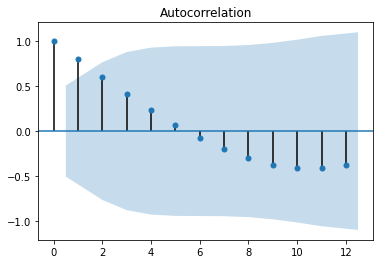

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['week'])
plt.show()

Dari hasil plot diatas, dapat disimplkan bahwa variabel week tidak memiliki atau sedikit memiliki autocorrelation dengan variabel Y yaitu pie_sales.

5. Heteroscedascity

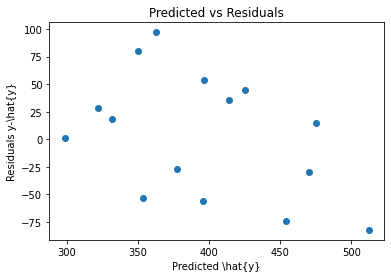

In [38]:
plt.plot(predictedY,Y-predictedY,'o')
plt.xlabel(r'Predicted \hat{y}')
plt.ylabel(r'Residuals y-\hat{y}')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [42]:
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
print(name, test)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (9.556307794442242, 0.008411513160508088, 7.021931022981566, 0.005558211693525515)


Dari hasil hipotesis testing untuk heteroskedascity didapatkan bahwa dataset dengan model linear regresion adalah ***heteroskedascity***. 

6. Check Independent Error

In [43]:
import statsmodels
statsmodels.stats.stattools.durbin_watson(model.resid)

2.049538029819211

Diberikan sebuah hasil statistik untuk cek independent error sebesar 2.05 menggunakan durbin watson tehnik. Pengujian memberikan bukti bahwa tidak ada korelasi serial yang berarti, kesalahan residual tidak berkorelasi dan independent.

#Refference

1. https://pythonfordatascienceorg.wordpress.com/linear-regression-python/<br>
2. https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab<br>
3. https://boostedml.com/2018/08/testing-linear-regression-assumptions-the-kaggle-housing-price-dataset.html